In [81]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import os
from sqlalchemy import create_engine
from dotenv import load_dotenv

# Load Data

In [82]:
load_dotenv()
username = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
server = os.getenv("DB_SERVER")
database = os.getenv("DB_NAME")

In [83]:
def load_data_from_sql(table_name):
    conn_str = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
    engine = create_engine(conn_str)
    return pd.read_sql(table_name, engine)

In [84]:
airport_df = load_data_from_sql("AIRPORT")
airline_df = load_data_from_sql("AIRLINE")
refund_policy_df = load_data_from_sql("REFUND_POLICY")
flight_schedule_df = load_data_from_sql("FLIGHT_SCHEDULE")
ticket_df = load_data_from_sql("TICKET")

# Explore Data Analysis

## Read rawdata from database

In [85]:
df = ticket_df.merge(flight_schedule_df, on=['Departure Time', 'Flight Code']).merge(refund_policy_df, on=['Airline_id', 'Fare Class'])
df.head(2)

,Departure Time,Passenger Type,Number of Tickets,Price per Ticket,Taxes & Fees,Total Price,Carry-on Baggage,Checked Baggage,Scrape Time,Flight Code,Fare Class,Airline_id,Departure Location Code,Arrival Location Code,Flight Duration,Arrival Time,Aircraft Type,Refund Policy
0,2025-04-01 23:05:00,Nguoi lon,1,1249000,804000,2053000,7,NaN,2025-03-31 08:55:44,QH290,ECONOMYSMART,AL001,SGN,HAN,2.17,2025-04-02 01:15:00,Airbus A321,"['- Áp dung hoàn vé mat phí', '- Áp dung doi v..."
1,2025-04-01 05:10:00,Nguoi lon,1,1419000,818000,2237000,7,NaN,2025-03-31 08:55:45,QH202,ECONOMYSMART,AL001,SGN,HAN,2.17,2025-04-01 07:20:00,Airbus A321,"['- Áp dung hoàn vé mat phí', '- Áp dung doi v..."


In [86]:
df

,Departure Time,Passenger Type,Number of Tickets,Price per Ticket,Taxes & Fees,Total Price,Carry-on Baggage,Checked Baggage,Scrape Time,Flight Code,Fare Class,Airline_id,Departure Location Code,Arrival Location Code,Flight Duration,Arrival Time,Aircraft Type,Refund Policy
0,2025-04-01 23:05:00,Nguoi lon,1,1249000,804000,2053000,7,NaN,2025-03-31 08:55:44,QH290,ECONOMYSMART,AL001,SGN,HAN,2.17,2025-04-02 01:15:00,Airbus A321,"['- Áp dung hoàn vé mat phí', '- Áp dung doi v..."
1,2025-04-01 05:10:00,Nguoi lon,1,1419000,818000,2237000,7,NaN,2025-03-31 08:55:45,QH202,ECONOMYSMART,AL001,SGN,HAN,2.17,2025-04-01 07:20:00,Airbus A321,"['- Áp dung hoàn vé mat phí', '- Áp dung doi v..."
2,2025-04-01 18:45:00,Nguoi lon,1,1419000,818000,2237000,7,NaN,2025-03-31 08:55:46,QH268,ECONOMYSMART,AL001,SGN,HAN,2.17,2025-04-01 20:55:00,Airbus A320,"['- Áp dung hoàn vé mat phí', '- Áp dung doi v..."
3,2025-04-01 20:00:00,Nguoi lon,1,1440000,820000,2260000,7,NaN,2025-03-31 08:55:46,VJ1176,I1_ECO,AL002,SGN,HAN,2.17,2025-04-01 22:10:00,Airbus A320,"['- Áp dung doi vé mat phí', '- Áp dung hoàn v..."
4,2025-04-01 20:05:00,Nguoi lon,1,1440000,820000,2260000,7,NaN,2025-03-31 08:55:47,VJ1160,I1_ECO,AL002,SGN,HAN,2.08,2025-04-01 22:10:00,Airbus A321,"['- Áp dung doi vé mat phí', '- Áp dung hoàn v..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12174,2025-06-30 13:20:00,Nguoi lon,1,3499000,969000,4468000,18,32.0,2025-03-31 10:02:39,VN132,C,AL004,SGN,DAD,1.50,2025-06-30 14:50:00,Airbus A321,"['- Áp dung hoàn vé mat phí', '- Áp dung doi v..."
12175,2025-06-30 14:30:00,Nguoi lon,1,3499000,969000,4468000,18,32.0,2025-03-31 10:02:39,VN7102,C,AL004,SGN,DAD,1.42,2025-06-30 15:55:00,Airbus A321,"['- Áp dung hoàn vé mat phí', '- Áp dung doi v..."
12176,2025-06-30 15:10:00,Nguoi lon,1,3499000,969000,4468000,18,32.0,2025-03-31 10:02:40,VN134,C,AL004,SGN,DAD,1.42,2025-06-30 16:35:00,Airbus A321,"['- Áp dung hoàn vé mat phí', '- Áp dung doi v..."
12177,2025-06-30 18:40:00,Nguoi lon,1,3499000,969000,4468000,18,32.0,2025-03-31 10:02:41,VN142,C,AL004,SGN,DAD,1.42,2025-06-30 20:05:00,Airbus A320,"['- Áp dung hoàn vé mat phí', '- Áp dung doi v..."


In [87]:
df.columns

Index(['Departure Time', 'Passenger Type', 'Number of Tickets',
       'Price per Ticket', 'Taxes & Fees', 'Total Price', 'Carry-on Baggage',
       'Checked Baggage', 'Scrape Time', 'Flight Code', 'Fare Class',
       'Airline_id', 'Departure Location Code', 'Arrival Location Code',
       'Flight Duration', 'Arrival Time', 'Aircraft Type', 'Refund Policy'],
      dtype='object')

## Check number of rows and columns, meanning of each row in the dataset

In [88]:
print("Shape:", df.shape)

Shape: (12179, 18)


> There are 12179 datapoints (or row) in the dataset.

> Each row in the dataset represent for the infomation of a flight, including its prices, arrival, destination,...

> There are 18 columns in the dataset

## Check duplicated rows in the dataset

In [89]:
df.duplicated().sum()

np.int64(0)

> There is no duplicated row in the dataset

## Check meanning and data type of each columns

In [90]:
print("\nData types:")
df.dtypes


Data types:


Departure Time              object
Passenger Type              object
Number of Tickets            int64
Price per Ticket             int64
Taxes & Fees                 int64
Total Price                  int64
Carry-on Baggage             int64
Checked Baggage            float64
Scrape Time                 object
Flight Code                 object
Fare Class                  object
Airline_id                  object
Departure Location Code     object
Arrival Location Code       object
Flight Duration            float64
Arrival Time                object
Aircraft Type               object
Refund Policy               object
dtype: object

|Column Name | Data Type | Description |
|------------|:-----------:|-------------|
| Departure Time | object | Scheduled time of flight departure. Should be converted to datetime |
| Arrival Time | object | Scheduled arrival time of the flight. Should be converted to datetime. |
| Departure Location Code | object | IATA code for the departure airport (e.g., SGN, HAN).|
| Arrival Location Code | object | IATA code for the arrival airport (e.g., DAD, HUI). |
| Airline_id | object | ID referencing the airline in a normalized airline table. |
| Flight Code | object | Flight identification code (e.g., VN123, VJ456). |
| Fare Class | object | Ticket class: Economy, Business, First, etc. |
| Aircraft Type | object | Model of the aircraft (e.g., Airbus A320, Boeing 777). |
| Flight Duration | float64 | Total flight duration in minutes or hours. |
| Passenger Type | object | Type of passenger. |
| Number of Tickets | int64 | Number of tickets booked in a single transaction. |
| Price per Ticket | int64 | Base price for one ticket, excluding taxes and fees. |
| Taxes & Fees | int64 | Additional costs such as airport taxes or service fees. |
| Total Price | int64 | Total price = ticket price + taxes and fees. |
| Carry-on Baggage | int64 | Allowed weight or number of carry-on items. |
| Checked Baggage | float64 | Allowed weight or number of checked baggage items. |
| Refund Policy | object | Description or ID referring to the refund policy. |
| Scrape Time | object | The timestamp when this data was scraped. Should be converted to datetime. |

## Check missing data

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12179 entries, 0 to 12178
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Departure Time           12179 non-null  object 
 1   Passenger Type           12179 non-null  object 
 2   Number of Tickets        12179 non-null  int64  
 3   Price per Ticket         12179 non-null  int64  
 4   Taxes & Fees             12179 non-null  int64  
 5   Total Price              12179 non-null  int64  
 6   Carry-on Baggage         12179 non-null  int64  
 7   Checked Baggage          7745 non-null   float64
 8   Scrape Time              12179 non-null  object 
 9   Flight Code              12179 non-null  object 
 10  Fare Class               12179 non-null  object 
 11  Airline_id               12179 non-null  object 
 12  Departure Location Code  12179 non-null  object 
 13  Arrival Location Code    12179 non-null  object 
 14  Flight Duration       

> Only `Checked Baggage` has missing values

In [92]:
print("Missing ration of Checked Baggage column:", (df['Checked Baggage'].isna().mean() * 100).round(2))

Missing ration of Checked Baggage column: 36.41


> Consider the context that `Checked Baggage` represents for the luggage that including the the price (no need to pay additional fee), we can fill None value in this column by 0

In [93]:
df['Checked Baggage'] = df['Checked Baggage'].fillna(0)

## Convert datatype for UCT times attribute

In [94]:
df['Departure Time'] = pd.to_datetime(df['Departure Time'], errors='coerce')
df['Arrival Time'] = pd.to_datetime(df['Arrival Time'], errors='coerce')
df['Scrape Time'] = pd.to_datetime(df['Scrape Time'], errors='coerce')

## Exploring datetime attributes

In [95]:
datetime_col_df = df.select_dtypes(include=['datetime64','datetime64[ns, UTC]'])
datetime_col_df.head()

,Departure Time,Scrape Time,Arrival Time
0,2025-04-01 23:05:00,2025-03-31 08:55:44,2025-04-02 01:15:00
1,2025-04-01 05:10:00,2025-03-31 08:55:45,2025-04-01 07:20:00
2,2025-04-01 18:45:00,2025-03-31 08:55:46,2025-04-01 20:55:00
3,2025-04-01 20:00:00,2025-03-31 08:55:46,2025-04-01 22:10:00
4,2025-04-01 20:05:00,2025-03-31 08:55:47,2025-04-01 22:10:00


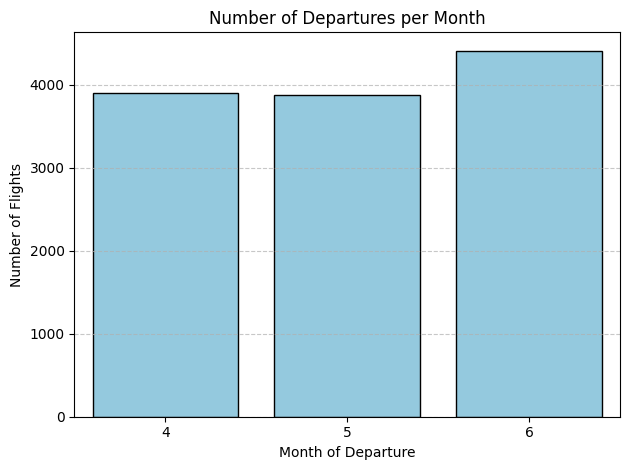

In [96]:
sns.barplot(datetime_col_df['Departure Time'].dt.month.value_counts().sort_index(), edgecolor='black', color='skyblue')
# plt.title('Number of Departures per Month', fontsize=14, fontweight='bold')
plt.title('Number of Departures per Month')
plt.xlabel('Month of Departure')
plt.ylabel('Number of Flights')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

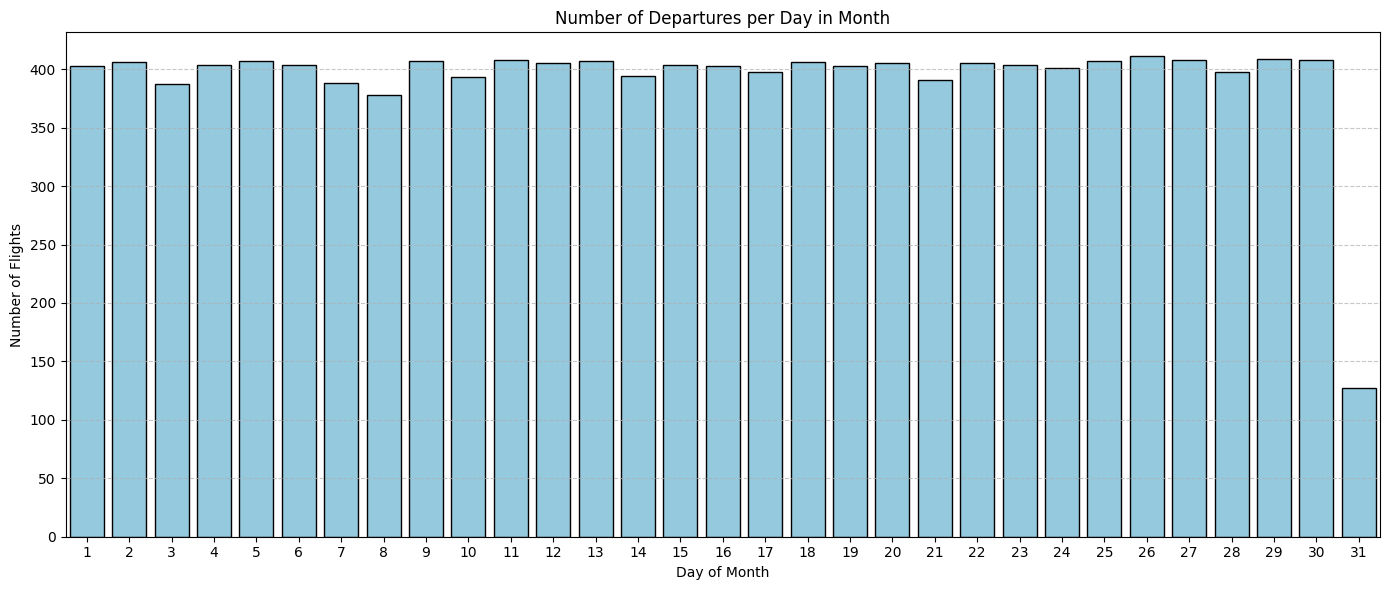

In [97]:
plt.figure(figsize=(14, 6)) 
sns.barplot(datetime_col_df['Departure Time'].dt.day.value_counts().sort_index(), edgecolor='black', color='skyblue')
plt.title('Number of Departures per Day in Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Flights')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

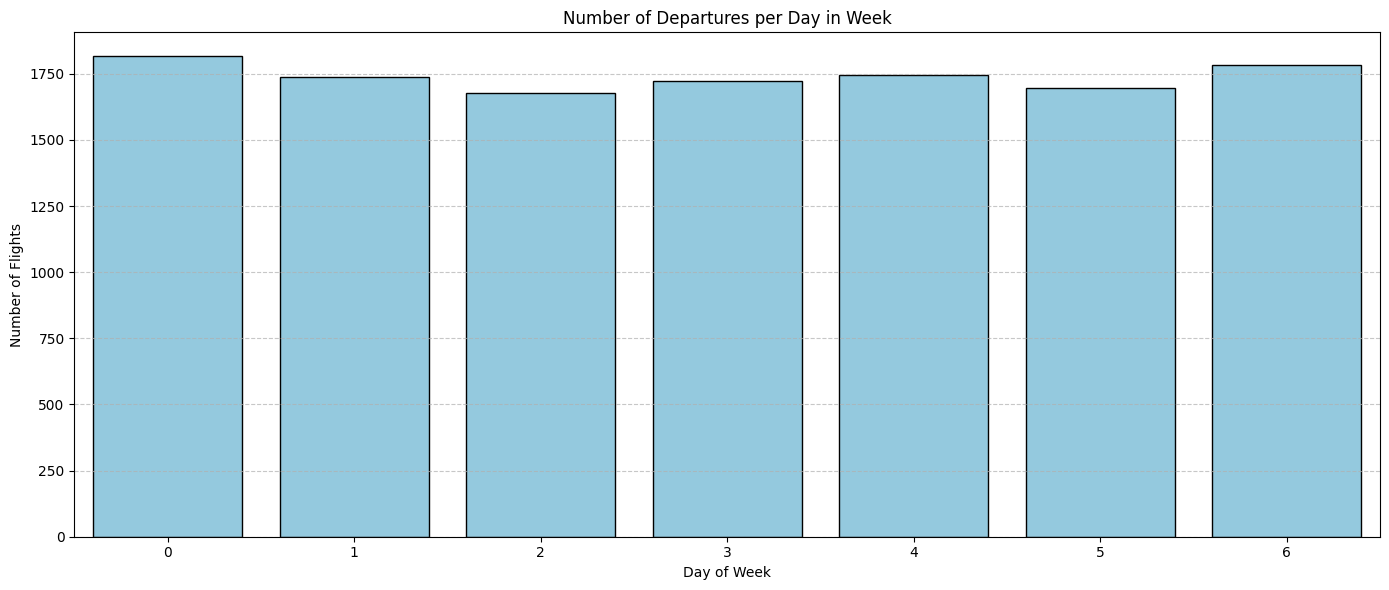

In [98]:
plt.figure(figsize=(14, 6)) 
sns.barplot(datetime_col_df['Departure Time'].dt.day_of_week.value_counts().sort_index(), edgecolor='black', color='skyblue')
plt.title('Number of Departures per Day in Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Flights')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

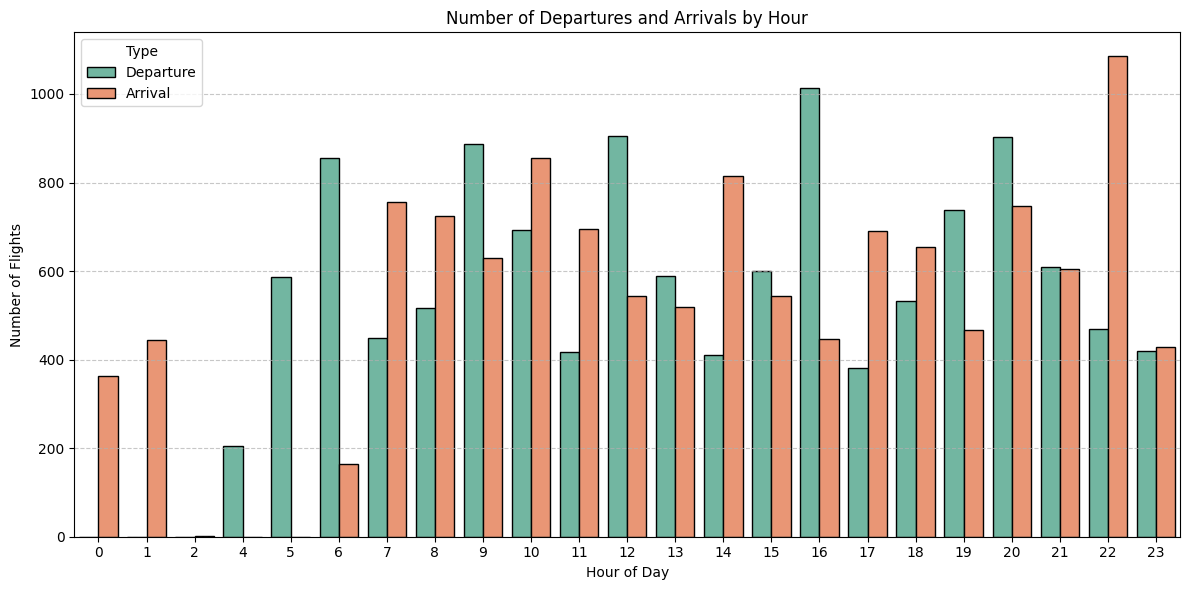

In [99]:
departure_counts = datetime_col_df['Departure Time'].dt.hour.value_counts().sort_index()
arrival_counts = datetime_col_df['Arrival Time'].dt.hour.value_counts().sort_index()

hourly_df = pd.DataFrame({'Departure': departure_counts}).join(
    pd.DataFrame({'Arrival': arrival_counts}), how='outer'
).fillna(0).astype(int).reset_index().rename(columns={'index': 'Hour'})

hourly_melted = hourly_df.melt(id_vars='Hour', value_vars=['Departure', 'Arrival'],
                               var_name='Type', value_name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_melted, x='Hour', y='Count', hue='Type', edgecolor='black', palette='Set2')
plt.title('Number of Departures and Arrivals by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Flights')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

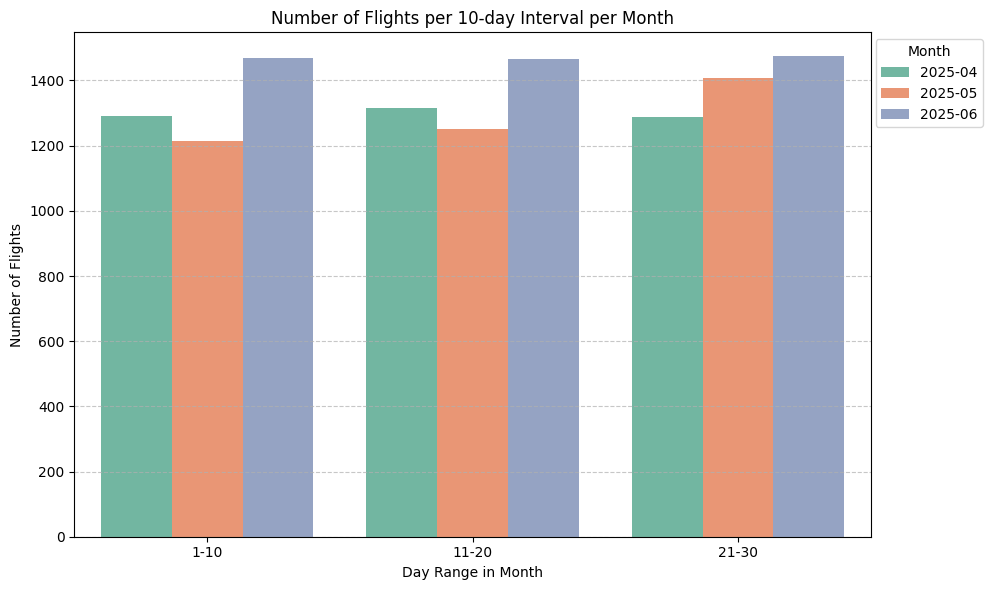

In [100]:
datetime_col_df['Month'] = datetime_col_df['Departure Time'].dt.to_period('M')
datetime_col_df['Day Group'] = datetime_col_df['Departure Time'].dt.day.apply(
    lambda d: f"{((d - 1) // 10) * 10 + 1}-{min(((d - 1) // 10 + 1) * 10, 31)}"
)
datetime_col_df.loc[datetime_col_df['Day Group'] == '31-31', 'Day Group'] = '21-30'
grouped = datetime_col_df.groupby(['Month', 'Day Group']).size().reset_index(name='Flight Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Day Group', y='Flight Count', hue='Month', palette='Set2') # (Set1, Set2, Paired, Dark2, ...)
plt.title('Number of Flights per 10-day Interval per Month')
plt.xlabel('Day Range in Month')
plt.ylabel('Number of Flights')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Month', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

## Exploring numerical attributes

In [101]:
num_col_df = df.select_dtypes(exclude=['datetime64[ns]', 'object'])
num_col_df.head()

,Number of Tickets,Price per Ticket,Taxes & Fees,Total Price,Carry-on Baggage,Checked Baggage,Flight Duration
0,1,1249000,804000,2053000,7,0.0,2.17
1,1,1419000,818000,2237000,7,0.0,2.17
2,1,1419000,818000,2237000,7,0.0,2.17
3,1,1440000,820000,2260000,7,0.0,2.17
4,1,1440000,820000,2260000,7,0.0,2.08


In [102]:
num_col_df.describe().round(0)

,Number of Tickets,Price per Ticket,Taxes & Fees,Total Price,Carry-on Baggage,Checked Baggage,Flight Duration
count,12179.0,12179.0,12179.0,12179.0,12179.0,12179.0,12179.0
mean,1.0,2562049.0,901162.0,3463211.0,11.0,18.0,2.0
std,0.0,2116651.0,165750.0,2282185.0,5.0,14.0,0.0
min,1.0,190000.0,720000.0,910000.0,7.0,0.0,1.0
25%,1.0,1089000.0,785000.0,1866000.0,7.0,0.0,1.0
50%,1.0,1639000.0,821000.0,2460000.0,10.0,23.0,2.0
75%,1.0,3137000.0,940000.0,4077000.0,18.0,32.0,2.0
max,1.0,7599000.0,1297000.0,8896000.0,18.0,40.0,2.0


> We can see that all rows of `Number of Tickets` column in dataset have the same value (1.0), so we can drop this column as it doesn't have any meaning!

In [103]:
df.drop(columns=['Number of Tickets'], inplace=True)

## Exploring non-numerical attributes

In [104]:
cat_col_df = df.select_dtypes(include='object')
cat_col_df.head()

,Passenger Type,Flight Code,Fare Class,Airline_id,Departure Location Code,Arrival Location Code,Aircraft Type,Refund Policy
0,Nguoi lon,QH290,ECONOMYSMART,AL001,SGN,HAN,Airbus A321,"['- Áp dung hoàn vé mat phí', '- Áp dung doi v..."
1,Nguoi lon,QH202,ECONOMYSMART,AL001,SGN,HAN,Airbus A321,"['- Áp dung hoàn vé mat phí', '- Áp dung doi v..."
2,Nguoi lon,QH268,ECONOMYSMART,AL001,SGN,HAN,Airbus A320,"['- Áp dung hoàn vé mat phí', '- Áp dung doi v..."
3,Nguoi lon,VJ1176,I1_ECO,AL002,SGN,HAN,Airbus A320,"['- Áp dung doi vé mat phí', '- Áp dung hoàn v..."
4,Nguoi lon,VJ1160,I1_ECO,AL002,SGN,HAN,Airbus A321,"['- Áp dung doi vé mat phí', '- Áp dung hoàn v..."


In [105]:
def missing_ratio(s):
    return (s.isnull().mean()*100).round(1)

def num_values(s):
    return len(s.value_counts())

def value_ratios(s):
    value_count = s.value_counts()
    return (((value_count/value_count.sum())*100).round(1)).to_dict()

cat_col_info_df = cat_col_df[['Passenger Type', 'Flight Code', 'Fare Class', 'Airline_id',
       'Departure Location Code', 'Arrival Location Code', 'Aircraft Type']].agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,Passenger Type,Flight Code,Fare Class,Airline_id,Departure Location Code,Arrival Location Code,Aircraft Type
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,1,126,42,5,1,2,7
value_ratios,{'Nguoi lon': 100.0},"{'VN6002': 1.5, 'VN210': 1.5, 'VN240': 1.5, 'V...","{'J': 14.2, 'W1_ECO': 7.7, 'I': 7.6, 'Z1_ECO':...","{'AL004': 53.8, 'AL002': 30.7, 'AL001': 9.7, '...",{'SGN': 100.0},"{'HAN': 61.9, 'DAD': 38.1}","{'Airbus A321': 59.0, 'Boeing 787': 19.5, 'Air..."


> We can see that all rows of `Passenger Type` and `Departure Location Code` column in dataset have the only one unique value, so we can drop these column as it doesn't have any meaning!

> Considering the context that we are solving the predict flight price problem, the `Flight Code` is not contribute to solve the problem, and to generalize the prediction, we should remove this column!

In [106]:
df.drop(columns=['Passenger Type', 'Departure Location Code', 'Flight Code'], inplace=True)

In [107]:
cat_col_info_df['Flight Code'].value_ratios

{'VN6002': 1.5,
 'VN210': 1.5,
 'VN240': 1.5,
 'VN208': 1.5,
 'VN214': 1.5,
 'VN244': 1.5,
 'VN212': 1.5,
 'VN248': 1.5,
 'VN206': 1.5,
 'VN246': 1.5,
 'VN148': 1.5,
 'VN140': 1.5,
 'VN6036': 1.5,
 'VN136': 1.5,
 'VN112': 1.5,
 'VN110': 1.5,
 'VN132': 1.5,
 'VN106': 1.5,
 'VN134': 1.5,
 'VN126': 1.5,
 'VN118': 1.5,
 'VN220': 1.5,
 'VN250': 1.5,
 'VN258': 1.5,
 'VN218': 1.5,
 'VN260': 1.5,
 'VN216': 1.5,
 'VN254': 1.5,
 'VN224': 1.5,
 'VN270': 1.5,
 'VN122': 1.5,
 'VN256': 1.5,
 'VN252': 1.4,
 'VN262': 1.4,
 'VN142': 1.4,
 'QH290': 1.3,
 'VN146': 1.2,
 'QH154': 1.1,
 'VJ178': 1.0,
 'QH254': 1.0,
 'QH150': 0.9,
 'QH268': 0.8,
 'VJ648': 0.7,
 'VJ1632': 0.7,
 'VJ1640': 0.7,
 'VJ654': 0.7,
 'VJ174': 0.7,
 'VJ1170': 0.7,
 'VJ1162': 0.7,
 'VJ1130': 0.7,
 'VJ146': 0.7,
 'VJ1152': 0.7,
 'VJ124': 0.7,
 'VJ180': 0.7,
 'VJ1198': 0.7,
 'VU750': 0.7,
 'VJ172': 0.7,
 'VU680': 0.7,
 'VJ190': 0.7,
 'VJ196': 0.7,
 'VJ1156': 0.7,
 'VJ120': 0.7,
 'VJ1132': 0.7,
 'VJ1126': 0.7,
 'VJ1160': 0.7,
 'VJ1176': 0

In [108]:
cat_col_info_df['Fare Class'].value_ratios

{'J': 14.2,
 'W1_ECO': 7.7,
 'I': 7.6,
 'Z1_ECO': 6.9,
 'ECONOMYSMART': 5.9,
 'N': 5.9,
 'D': 4.5,
 'L': 4.3,
 'K': 4.3,
 'J1_ECO': 3.8,
 'BUSINESSSMART': 3.5,
 'R': 3.4,
 'U1_ECO': 3.3,
 'Q': 3.0,
 'T': 2.9,
 'B': 2.8,
 'C': 2.8,
 'H': 1.8,
 'I1_ECO': 1.8,
 'C_Boss': 1.5,
 'B1_ECO': 1.4,
 'A1_ECO': 1.3,
 'H1_ECO': 1.0,
 'S': 0.7,
 'E': 0.6,
 'K1_ECO': 0.5,
 'M': 0.5,
 'T1_ECO': 0.4,
 'L1_ECO': 0.3,
 'N1_ECO': 0.3,
 'D_Boss': 0.2,
 'M1_ECO': 0.2,
 'ECONOMYFLEX': 0.2,
 'W': 0.1,
 'U': 0.1,
 'E1_ECO': 0.0,
 'BUSINESSFLEX': 0.0,
 'O': 0.0,
 'Q1_ECO': 0.0,
 'O1_ECO': 0.0,
 'C_BOSS': 0.0,
 'R1_ECO': 0.0}

In [109]:
cat_col_info_df['Airline_id'].value_ratios

{'AL004': 53.8, 'AL002': 30.7, 'AL001': 9.7, 'AL005': 4.3, 'AL003': 1.5}

In [110]:
cat_col_info_df['Aircraft Type'].value_ratios

{'Airbus A321': 59.0,
 'Boeing 787': 19.5,
 'Airbus A320': 6.8,
 'Airbus A359': 4.9,
 '320B': 3.6,
 'Airbus A330': 3.4,
 'Airbus A350': 2.7}

In [111]:
import ast

cat_col_df['Refund Policy'] = cat_col_df['Refund Policy'].apply(lambda x: ast.literal_eval(x) if not pd.isna(x) else None)
cat_col_df

,Passenger Type,Flight Code,Fare Class,Airline_id,Departure Location Code,Arrival Location Code,Aircraft Type,Refund Policy
0,Nguoi lon,QH290,ECONOMYSMART,AL001,SGN,HAN,Airbus A321,"[- Áp dung hoàn vé mat phí, - Áp dung doi vé m..."
1,Nguoi lon,QH202,ECONOMYSMART,AL001,SGN,HAN,Airbus A321,"[- Áp dung hoàn vé mat phí, - Áp dung doi vé m..."
2,Nguoi lon,QH268,ECONOMYSMART,AL001,SGN,HAN,Airbus A320,"[- Áp dung hoàn vé mat phí, - Áp dung doi vé m..."
3,Nguoi lon,VJ1176,I1_ECO,AL002,SGN,HAN,Airbus A320,"[- Áp dung doi vé mat phí, - Áp dung hoàn vé m..."
4,Nguoi lon,VJ1160,I1_ECO,AL002,SGN,HAN,Airbus A321,"[- Áp dung doi vé mat phí, - Áp dung hoàn vé m..."
...,...,...,...,...,...,...,...,...
12174,Nguoi lon,VN132,C,AL004,SGN,DAD,Airbus A321,"[- Áp dung hoàn vé mat phí, - Áp dung doi vé m..."
12175,Nguoi lon,VN7102,C,AL004,SGN,DAD,Airbus A321,"[- Áp dung hoàn vé mat phí, - Áp dung doi vé m..."
12176,Nguoi lon,VN134,C,AL004,SGN,DAD,Airbus A321,"[- Áp dung hoàn vé mat phí, - Áp dung doi vé m..."
12177,Nguoi lon,VN142,C,AL004,SGN,DAD,Airbus A320,"[- Áp dung hoàn vé mat phí, - Áp dung doi vé m..."


In [112]:
cat_col_df['Refund Policy'].explode().value_counts()

Refund Policy
- Áp dung hoàn vé mat phí                        11997
- Không áp dung doi tên                          11786
- Áp dung doi vé mat phí                         11362
- Mien phí quay uu tiên                           3563
- Mien phí phòng cho BSV                          3535
- Áp dung doi vé mien phí                          424
- Mien phí chon ghe                                378
- Áp dung doi vé mien phí, thu chênh lech giá      211
- Áp dung doi tên mat phí                          211
- Mien phí chon cho truoc                          211
Name: count, dtype: int64

# Features Engineering

## Encoding categorical

In [113]:
cat_col_df = df.select_dtypes(include='object')
cat_col_df.head(5)

,Fare Class,Airline_id,Arrival Location Code,Aircraft Type,Refund Policy
0,ECONOMYSMART,AL001,HAN,Airbus A321,"['- Áp dung hoàn vé mat phí', '- Áp dung doi v..."
1,ECONOMYSMART,AL001,HAN,Airbus A321,"['- Áp dung hoàn vé mat phí', '- Áp dung doi v..."
2,ECONOMYSMART,AL001,HAN,Airbus A320,"['- Áp dung hoàn vé mat phí', '- Áp dung doi v..."
3,I1_ECO,AL002,HAN,Airbus A320,"['- Áp dung doi vé mat phí', '- Áp dung hoàn v..."
4,I1_ECO,AL002,HAN,Airbus A321,"['- Áp dung doi vé mat phí', '- Áp dung hoàn v..."


In [114]:
cat_col_df = pd.get_dummies(cat_col_df, columns=['Fare Class', 'Arrival Location Code', 'Airline_id', 'Aircraft Type'], prefix=['Fare_Class', 'Arrival_Code', 'Airline_id', 'Aircraft_Type'], prefix_sep="_")
cat_col_df.head(2)

,Refund Policy,Fare_Class_A1_ECO,Fare_Class_B,Fare_Class_B1_ECO,Fare_Class_BUSINESSFLEX,Fare_Class_BUSINESSSMART,Fare_Class_C,Fare_Class_C_BOSS,Fare_Class_C_Boss,Fare_Class_D,...,Airline_id_AL003,Airline_id_AL004,Airline_id_AL005,Aircraft_Type_320B,Aircraft_Type_Airbus A320,Aircraft_Type_Airbus A321,Aircraft_Type_Airbus A330,Aircraft_Type_Airbus A350,Aircraft_Type_Airbus A359,Aircraft_Type_Boeing 787
0,"['- Áp dung hoàn vé mat phí', '- Áp dung doi v...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,"['- Áp dung hoàn vé mat phí', '- Áp dung doi v...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [115]:
from sklearn.preprocessing import MultiLabelBinarizer
from unidecode import unidecode

In [116]:
mlb = MultiLabelBinarizer()
mlb

MultiLabelBinarizer()

In [117]:
one_hot = pd.DataFrame(
    mlb.fit_transform(cat_col_df['Refund Policy'].apply(lambda x: ast.literal_eval(x) if not pd.isna(x) else None)),
    columns=mlb.classes_,
    index=df.index
)
one_hot.columns = [unidecode(c).strip("- ").strip().replace(" ", "_").replace(",","") for c in one_hot.columns]
one_hot.head()

,Khong_ap_dung_doi_ten,Mien_phi_chon_cho_truoc,Mien_phi_chon_ghe,Mien_phi_phong_cho_BSV,Mien_phi_quay_uu_tien,Ap_dung_doi_ten_mat_phi,Ap_dung_doi_ve_mat_phi,Ap_dung_doi_ve_mien_phi,Ap_dung_doi_ve_mien_phi_thu_chenh_lech_gia,Ap_dung_hoan_ve_mat_phi
0,1,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,1,0,0,1


In [118]:
cat_col_df = pd.concat([cat_col_df, one_hot], axis=1).drop(columns=['Refund Policy']).astype(np.int8)
cat_col_df.head()

,Fare_Class_A1_ECO,Fare_Class_B,Fare_Class_B1_ECO,Fare_Class_BUSINESSFLEX,Fare_Class_BUSINESSSMART,Fare_Class_C,Fare_Class_C_BOSS,Fare_Class_C_Boss,Fare_Class_D,Fare_Class_D_Boss,...,Khong_ap_dung_doi_ten,Mien_phi_chon_cho_truoc,Mien_phi_chon_ghe,Mien_phi_phong_cho_BSV,Mien_phi_quay_uu_tien,Ap_dung_doi_ten_mat_phi,Ap_dung_doi_ve_mat_phi,Ap_dung_doi_ve_mien_phi,Ap_dung_doi_ve_mien_phi_thu_chenh_lech_gia,Ap_dung_hoan_ve_mat_phi
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


## Add more features

### Time departure

In [119]:
df_add = df.select_dtypes(include="datetime").copy()
df_add.head()

,Departure Time,Scrape Time,Arrival Time
0,2025-04-01 23:05:00,2025-03-31 08:55:44,2025-04-02 01:15:00
1,2025-04-01 05:10:00,2025-03-31 08:55:45,2025-04-01 07:20:00
2,2025-04-01 18:45:00,2025-03-31 08:55:46,2025-04-01 20:55:00
3,2025-04-01 20:00:00,2025-03-31 08:55:46,2025-04-01 22:10:00
4,2025-04-01 20:05:00,2025-03-31 08:55:47,2025-04-01 22:10:00


In [120]:
df_add['Departure Hour'] = df_add['Departure Time'].dt.hour
df_add['Departure DayOfWeek'] = df_add['Departure Time'].dt.dayofweek

### Days Before Departure

In [121]:
df_add['Days Before Departure'] = (df_add['Departure Time'] - df_add['Scrape Time']).dt.days

In [122]:
df_add.head()

,Departure Time,Scrape Time,Arrival Time,Departure Hour,Departure DayOfWeek,Days Before Departure
0,2025-04-01 23:05:00,2025-03-31 08:55:44,2025-04-02 01:15:00,23,1,1
1,2025-04-01 05:10:00,2025-03-31 08:55:45,2025-04-01 07:20:00,5,1,0
2,2025-04-01 18:45:00,2025-03-31 08:55:46,2025-04-01 20:55:00,18,1,1
3,2025-04-01 20:00:00,2025-03-31 08:55:46,2025-04-01 22:10:00,20,1,1
4,2025-04-01 20:05:00,2025-03-31 08:55:47,2025-04-01 22:10:00,20,1,1


## Outlier handling

> Consider 3 columns: `Price per Ticket`, `Taxes & Fees`, `Total Price`, if we have one column, we usually can infer two others. Therefore, we only need to retain 1 of them. In this case, I will remain the column `Total Price`.

In [123]:
num_col_df = df.select_dtypes(exclude=["object", "datetime64"]).drop(columns=["Price per Ticket", "Taxes & Fees"])
num_col_df

,Total Price,Carry-on Baggage,Checked Baggage,Flight Duration
0,2053000,7,0.0,2.17
1,2237000,7,0.0,2.17
2,2237000,7,0.0,2.17
3,2260000,7,0.0,2.17
4,2260000,7,0.0,2.08
...,...,...,...,...
12174,4468000,18,32.0,1.50
12175,4468000,18,32.0,1.42
12176,4468000,18,32.0,1.42
12177,4468000,18,32.0,1.42


In [124]:
num_col_df.describe()

,Total Price,Carry-on Baggage,Checked Baggage,Flight Duration
count,1.217900e+04,12179.000000,12179.000000,12179.000000
mean,3.463211e+06,11.204368,18.133591,1.847424
std,2.282185e+06,4.594533,14.413883,0.355923
min,9.100000e+05,7.000000,0.000000,1.250000
25%,1.866000e+06,7.000000,0.000000,1.420000
50%,2.460000e+06,10.000000,23.000000,2.080000
75%,4.077000e+06,18.000000,32.000000,2.170000
max,8.896000e+06,18.000000,40.000000,2.250000


In [125]:
num_col_df = df.select_dtypes(exclude=['object', 'datetime'])
num_col_df.head()

,Price per Ticket,Taxes & Fees,Total Price,Carry-on Baggage,Checked Baggage,Flight Duration
0,1249000,804000,2053000,7,0.0,2.17
1,1419000,818000,2237000,7,0.0,2.17
2,1419000,818000,2237000,7,0.0,2.17
3,1440000,820000,2260000,7,0.0,2.17
4,1440000,820000,2260000,7,0.0,2.08


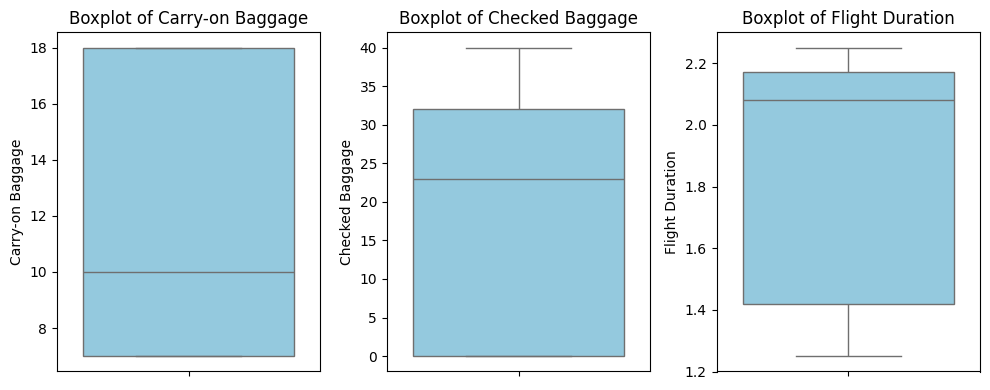

In [126]:
plt.figure(figsize=(10,4))

for i, col in enumerate(['Carry-on Baggage', 'Checked Baggage', 'Flight Duration'], 1):
    plt.subplot(1,3,i)
    sns.boxplot(y=num_col_df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

> There is no outlier in three columns `Carry-on Baggage`, `Checked Baggage`, `Flight Duration`

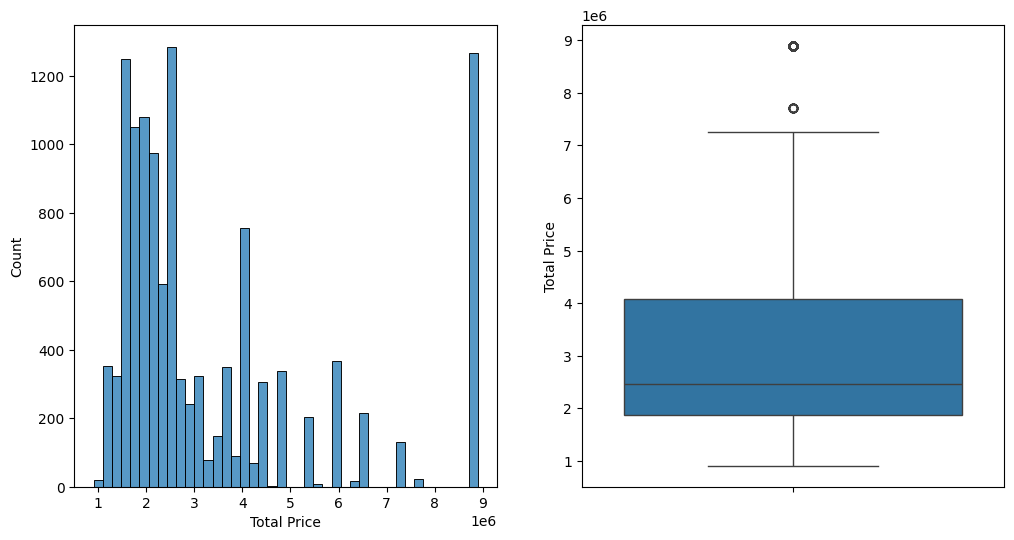

In [127]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(num_col_df['Total Price'])

plt.subplot(1,2,2)
sns.boxplot(num_col_df['Total Price'])
plt.show()

> We can see that according to the boxlot, tickets having price greater than 7 million dong is considered as outliers. But noted that, in the histogram, we could see that, the number of tickets having price greater than 7 million dong is very large. Maybe this is reflect the high class tickets. So, I decide to remain this column.

## Feature scaling

In [128]:
num_col_df = df.select_dtypes(exclude=['object', 'datetime']).copy()
num_col_df

,Price per Ticket,Taxes & Fees,Total Price,Carry-on Baggage,Checked Baggage,Flight Duration
0,1249000,804000,2053000,7,0.0,2.17
1,1419000,818000,2237000,7,0.0,2.17
2,1419000,818000,2237000,7,0.0,2.17
3,1440000,820000,2260000,7,0.0,2.17
4,1440000,820000,2260000,7,0.0,2.08
...,...,...,...,...,...,...
12174,3499000,969000,4468000,18,32.0,1.50
12175,3499000,969000,4468000,18,32.0,1.42
12176,3499000,969000,4468000,18,32.0,1.42
12177,3499000,969000,4468000,18,32.0,1.42


In [129]:
num_col_df.columns

Index(['Price per Ticket', 'Taxes & Fees', 'Total Price', 'Carry-on Baggage',
       'Checked Baggage', 'Flight Duration'],
      dtype='object')

In [130]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import joblib

scalers = {}
num_scaled = pd.DataFrame()
for col in num_col_df.columns:
    scaler = StandardScaler()
    num_scaled[col] = scaler.fit_transform(num_col_df[[col]])[:, 0]
    scalers[col] = scaler

joblib.dump(scalers, 'scalers_per_column.pkl')
num_scaled

,Price per Ticket,Taxes & Fees,Total Price,Carry-on Baggage,Checked Baggage,Flight Duration
0,-0.620368,-0.586222,-0.617947,-0.915118,-1.258116,0.906345
1,-0.540049,-0.501754,-0.537319,-0.915118,-1.258116,0.906345
2,-0.540049,-0.501754,-0.537319,-0.915118,-1.258116,0.906345
3,-0.530127,-0.489687,-0.527240,-0.915118,-1.258116,0.906345
4,-0.530127,-0.489687,-0.527240,-0.915118,-1.258116,0.653471
...,...,...,...,...,...,...
12174,0.442676,0.409295,0.440293,1.479130,0.962057,-0.976162
12175,0.442676,0.409295,0.440293,1.479130,0.962057,-1.200939
12176,0.442676,0.409295,0.440293,1.479130,0.962057,-1.200939
12177,0.442676,0.409295,0.440293,1.479130,0.962057,-1.200939


In [131]:
num_scaled.describe()

,Price per Ticket,Taxes & Fees,Total Price,Carry-on Baggage,Checked Baggage,Flight Duration
count,1.217900e+04,12179.000000,12179.000000,1.217900e+04,1.217900e+04,1.217900e+04
mean,5.600797e-17,0.000000,0.000000,3.529669e-17,-1.026813e-16,-5.227410e-16
std,1.000041e+00,1.000041,1.000041,1.000041e+00,1.000041e+00,1.000041e+00
min,-1.120707e+00,-1.093030,-1.118803,-9.151182e-01,-1.258116e+00,-1.678591e+00
25%,-6.959623e-01,-0.700857,-0.699889,-9.151182e-01,-1.258116e+00,-1.200939e+00
50%,-4.361072e-01,-0.483653,-0.439602,-2.621415e-01,3.376335e-01,6.534711e-01
75%,2.716437e-01,0.234326,0.268959,1.479130e+00,9.620571e-01,9.063452e-01
max,2.379777e+00,2.388262,2.380618,1.479130e+00,1.517100e+00,1.131122e+00


# Save data

In [132]:
final_df = pd.concat([num_scaled[['Carry-on Baggage', 'Checked Baggage', 'Flight Duration']], 
                      cat_col_df, 
                      df_add.drop(columns=["Departure Time", "Scrape Time", "Arrival Time"]),
                      num_scaled['Total Price']], axis=1)
final_df.head()

,Carry-on Baggage,Checked Baggage,Flight Duration,Fare_Class_A1_ECO,Fare_Class_B,Fare_Class_B1_ECO,Fare_Class_BUSINESSFLEX,Fare_Class_BUSINESSSMART,Fare_Class_C,Fare_Class_C_BOSS,...,Mien_phi_quay_uu_tien,Ap_dung_doi_ten_mat_phi,Ap_dung_doi_ve_mat_phi,Ap_dung_doi_ve_mien_phi,Ap_dung_doi_ve_mien_phi_thu_chenh_lech_gia,Ap_dung_hoan_ve_mat_phi,Departure Hour,Departure DayOfWeek,Days Before Departure,Total Price
0,-0.915118,-1.258116,0.906345,0,0,0,0,0,0,0,...,0,0,1,0,0,1,23,1,1,-0.617947
1,-0.915118,-1.258116,0.906345,0,0,0,0,0,0,0,...,0,0,1,0,0,1,5,1,0,-0.537319
2,-0.915118,-1.258116,0.906345,0,0,0,0,0,0,0,...,0,0,1,0,0,1,18,1,1,-0.537319
3,-0.915118,-1.258116,0.906345,0,0,0,0,0,0,0,...,0,0,1,0,0,1,20,1,1,-0.527240
4,-0.915118,-1.258116,0.653471,0,0,0,0,0,0,0,...,0,0,1,0,0,1,20,1,1,-0.527240


In [133]:
final_df.columns

Index(['Carry-on Baggage', 'Checked Baggage', 'Flight Duration',
       'Fare_Class_A1_ECO', 'Fare_Class_B', 'Fare_Class_B1_ECO',
       'Fare_Class_BUSINESSFLEX', 'Fare_Class_BUSINESSSMART', 'Fare_Class_C',
       'Fare_Class_C_BOSS', 'Fare_Class_C_Boss', 'Fare_Class_D',
       'Fare_Class_D_Boss', 'Fare_Class_E', 'Fare_Class_E1_ECO',
       'Fare_Class_ECONOMYFLEX', 'Fare_Class_ECONOMYSMART', 'Fare_Class_H',
       'Fare_Class_H1_ECO', 'Fare_Class_I', 'Fare_Class_I1_ECO',
       'Fare_Class_J', 'Fare_Class_J1_ECO', 'Fare_Class_K',
       'Fare_Class_K1_ECO', 'Fare_Class_L', 'Fare_Class_L1_ECO',
       'Fare_Class_M', 'Fare_Class_M1_ECO', 'Fare_Class_N',
       'Fare_Class_N1_ECO', 'Fare_Class_O', 'Fare_Class_O1_ECO',
       'Fare_Class_Q', 'Fare_Class_Q1_ECO', 'Fare_Class_R',
       'Fare_Class_R1_ECO', 'Fare_Class_S', 'Fare_Class_T',
       'Fare_Class_T1_ECO', 'Fare_Class_U', 'Fare_Class_U1_ECO',
       'Fare_Class_W', 'Fare_Class_W1_ECO', 'Fare_Class_Z1_ECO',
       'Arrival_Code_

In [134]:
os.makedirs("../data/data_for_modeling/", exist_ok=True)
final_df.to_csv("../data/data_for_modeling/data.csv", index=False)

# Model

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error

## Load dataset

In [136]:
df = pd.read_csv("../data/data_for_modeling/data.csv")
df.head()

,Carry-on Baggage,Checked Baggage,Flight Duration,Fare_Class_A1_ECO,Fare_Class_B,Fare_Class_B1_ECO,Fare_Class_BUSINESSFLEX,Fare_Class_BUSINESSSMART,Fare_Class_C,Fare_Class_C_BOSS,...,Mien_phi_quay_uu_tien,Ap_dung_doi_ten_mat_phi,Ap_dung_doi_ve_mat_phi,Ap_dung_doi_ve_mien_phi,Ap_dung_doi_ve_mien_phi_thu_chenh_lech_gia,Ap_dung_hoan_ve_mat_phi,Departure Hour,Departure DayOfWeek,Days Before Departure,Total Price
0,-0.915118,-1.258116,0.906345,0,0,0,0,0,0,0,...,0,0,1,0,0,1,23,1,1,-0.617947
1,-0.915118,-1.258116,0.906345,0,0,0,0,0,0,0,...,0,0,1,0,0,1,5,1,0,-0.537319
2,-0.915118,-1.258116,0.906345,0,0,0,0,0,0,0,...,0,0,1,0,0,1,18,1,1,-0.537319
3,-0.915118,-1.258116,0.906345,0,0,0,0,0,0,0,...,0,0,1,0,0,1,20,1,1,-0.527240
4,-0.915118,-1.258116,0.653471,0,0,0,0,0,0,0,...,0,0,1,0,0,1,20,1,1,-0.527240


In [137]:
scaler = joblib.load("scalers_per_column.pkl")
scaler

{'Price per Ticket': StandardScaler(),
 'Taxes & Fees': StandardScaler(),
 'Total Price': StandardScaler(),
 'Carry-on Baggage': StandardScaler(),
 'Checked Baggage': StandardScaler(),
 'Flight Duration': StandardScaler()}

## Split data into train and test

In [138]:
X = final_df.drop(columns=['Total Price'])
y = final_df['Total Price']
X.columns = [str(col) for col in X.columns]

In [139]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42, shuffle=True
)

## Model Selection

In [140]:
from sklearn.model_selection import KFold

In [141]:
class ModelSelectorCV:
    def __init__(self, models, X_train, y_train, X_val=None, y_val=None, X_test=None, y_test=None, n_splits=5):
        self.models = models
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.X_test = X_test
        self.y_test = y_test
        self.n_splits = n_splits
        self.results = []
    
    def cross_validate_model(self, model, name):
        kf = KFold(n_splits=self.n_splits, shuffle=True, random_state=42)
        r2_scores = []
        rmse_scores = []

        for train_idx, val_idx in kf.split(self.X_train):
            X_tr, X_val = self.X_train.iloc[train_idx], self.X_train.iloc[val_idx]
            y_tr, y_val = self.y_train.iloc[train_idx], self.y_train.iloc[val_idx]

            model.fit(X_tr, y_tr)
            y_pred = model.predict(X_val)
            r2 = r2_score(y_true=y_val, y_pred=y_pred)
            rmse = root_mean_squared_error(y_true=y_val, y_pred=y_pred)

            r2_scores.append(r2)
            rmse_scores.append(rmse)

        return {
            "model_name": name,
            "mean_r2": np.mean(r2_scores),
            "mean_rmse": np.mean(rmse_scores),
            "model_object": model
        }
    
    def run_cv(self):
        print(f" Training K-Fold CV with {self.n_splits} folds...\n")
        for name, model in self.models:
            try:
                result = self.cross_validate_model(model, name)
                self.results.append(result)
                print(f"{name:15} | R2 (mean): {result['mean_r2']:.4f} | RMSE (mean): {result['mean_rmse']:.2f}")
            except Exception as e:
                print(f"Error while evaluating {name}: {e}")

    def get_best_model(self, by="mean_r2"):
        if by == "mean_r2":
            return sorted(self.results, key=lambda x: (x["mean_r2"], -x["mean_rmse"]), reverse=True)[0]
        elif by == "mean_rmse":
            return sorted(self.results, key=lambda x: (x["mean_rmse"], -x["mean_r2"]))[0]
        else:
            raise ValueError("Only support by 'mean_r2' or 'mean_rmse'.")
    
    # def fine_tune_and_test(self, save_path="models/best_model.pkl"):
    #     best = self.get_best_model()
    #     best_model = best["model_object"]
    #     name = best["model_name"]

    #     print(f"\n🔥 Best model from CV: {name}")
    #     print("📈 Đang fine-tune với tập eval (nếu có)...")

    #     # Combine train + val nếu val tồn tại
    #     if self.X_val is not None and self.y_val is not None:
    #         X_final = pd.concat([self.X_train, self.X_val])
    #         y_final = pd.concat([self.y_train, self.y_val])
    #     else:
    #         X_final = self.X_train
    #         y_final = self.y_train

    #     # Train lại mô hình tốt nhất
    #     best_model.fit(X_final, y_final)

    #     # Test mô hình 1 lần duy nhất
    #     if self.X_test is not None and self.y_test is not None:
    #         y_pred = best_model.predict(self.X_test)
    #         mae = mean_absolute_error(self.y_test, y_pred)
    #         rmse = np.sqrt(mean_squared_error(self.y_test, y_pred))
    #         r2 = r2_score(self.y_test, y_pred)

    #         print("\n✅ Đánh giá mô hình tốt nhất trên tập test:")
    #         print(f"→ MAE: {mae:.2f}")
    #         print(f"→ RMSE: {rmse:.2f}")
    #         print(f"→ R2 Score: {r2:.4f}")

    #     # Lưu mô hình
    #     os.makedirs(os.path.dirname(save_path), exist_ok=True)
    #     joblib.dump(best_model, save_path)
    #     print(f"\n💾 Đã lưu mô hình vào: {save_path}")

In [142]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [143]:
models = [
    ("LinearRegression", LinearRegression()),
    ("Ridge", Ridge()),
    ("RandomForest", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("XGBoost", XGBRegressor(n_estimators=100, random_state=42)),
    ("LightGBM", LGBMRegressor(n_estimators=100, random_state=42)),
]


In [144]:
selector = ModelSelectorCV(
    models, X_train, y_train,
    X_val=X_val, y_val=y_val,
    X_test=X_test, y_test=y_test,
    n_splits=5
)

selector.run_cv()

 Training K-Fold CV with 5 folds...

LinearRegression | R2 (mean): 0.9533 | RMSE (mean): 0.22
Ridge           | R2 (mean): 0.9532 | RMSE (mean): 0.22
RandomForest    | R2 (mean): 0.9972 | RMSE (mean): 0.05
XGBoost         | R2 (mean): 0.9973 | RMSE (mean): 0.05
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 248
[LightGBM] [Info] Number of data points in the train set: 7014, number of used features: 60
[LightGBM] [Info] Start training from score 0.001066
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memor

In [145]:
best_model = selector.get_best_model()["model_object"]
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

## Model finetuning

In [146]:
from sklearn.model_selection import GridSearchCV

In [147]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=best_model,
    param_grid=param_grid,
    scoring='r2',  #'r2' 'neg_root_mean_squared_error
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [149]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 1.0],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 6, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 1.0]},
             scoring='r2', verbose=1)

In [150]:
best_model = grid_search.best_estimator_
y_pred_eval = best_model.predict(X_val)

In [151]:
print("Best hyperparameters:", grid_search.best_params_)
print("Eval R²:", r2_score(y_val, y_pred_eval))
print("Eval RMSE:", root_mean_squared_error(y_val, y_pred_eval))

Best hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}
Eval R²: 0.9984903913526217
Eval RMSE: 0.03896438456107938


## Model Testing

### Train the best model with fine-tuned hyper parameters on train + val set

In [152]:
X_train_full = pd.concat([X_train, X_val])
y_train_full = pd.concat([y_train, y_val])

In [153]:
best_model.fit(X_train_full, y_train_full)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

### Model testing

In [154]:
y_pred_test = best_model.predict(X_test)

print("FINAL TEST RESULTS:")
print("Test R²:", r2_score(y_test, y_pred_test))
print("Test RMSE:", root_mean_squared_error(y_test, y_pred_test))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))

FINAL TEST RESULTS:
Test R²: 0.9980992337212083
Test RMSE: 0.04248598017095727
Test MAE: 0.010795865339024218


In [ ]:
y_test_original = scaler['Total Price'].inverse_transform(y_test.values.reshape(-1, 1))
y_pred_original = scaler['Total Price'].inverse_transform(y_pred_test.reshape(-1, 1))

# ➤ Tính lại các chỉ số
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print("FINAL TEST RESULTS (original):")
print("Test R²:", r2_score(y_test_original, y_pred_original))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_original, y_pred_original)))
print("Test MAE:", mean_absolute_error(y_test_original, y_pred_original))

✅ FINAL TEST RESULTS (original):
Test R²: 0.9980992336548127
Test RMSE: 96956.90373701412
Test MAE: 24637.148912151064


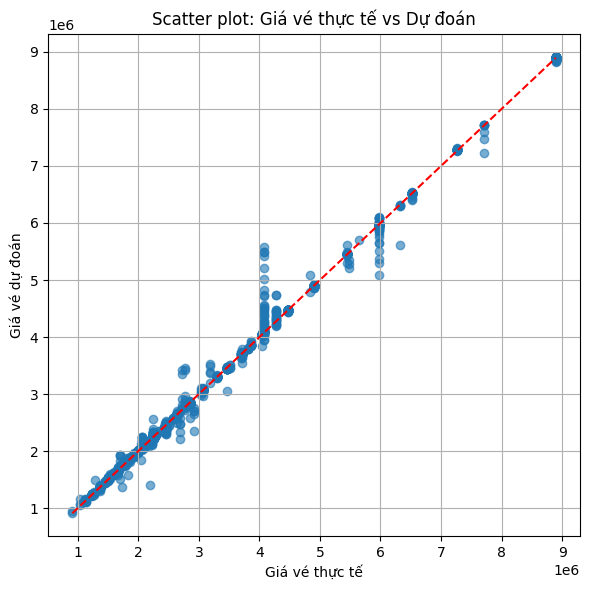

In [156]:
y_test_original = y_test_original.flatten()
y_pred_original = y_pred_original.flatten()

plt.figure(figsize=(6, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.6)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'r--')  
plt.xlabel("Giá vé thực tế")
plt.ylabel("Giá vé dự đoán")
plt.title("Scatter plot: Giá vé thực tế vs Dự đoán")
plt.grid(True)
plt.tight_layout()
plt.show()

In [157]:
os.makedirs("models", exist_ok=True)
joblib.dump(best_model, "models/final_best_model.pkl")

['models/final_best_model.pkl']